# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [200]:
#Importing necessary libraries and reading readinng twitter_archive_enhanced.csv in pandas.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import requests
from io import BytesIO

% matplotlib inline

df_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [201]:
#viewing first 2 observation in the twitter-archive-enhance data
df_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [202]:
#downloading the image_predictions.tsv
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image-predictions.tsv', 'wb') as f: 
 f.write(r.content)

In [203]:
#reading image-predictions.tsv into pandas datafram and viewing fisrt two observations
df_imagepred = pd.read_csv('image-predictions.tsv', sep='\t')
df_imagepred.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [204]:
#alternatively reading image-predictions.tsv in pandas right away
df_imagepred2 =pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv',sep=('\t'))
df_imagepred2.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [205]:
with open('API_key.txt','r') as f:
 consumer_key = f.readlines()
print(consumer_key,type(consumer_key))

FileNotFoundError: [Errno 2] No such file or directory: 'API_key.txt'

In [206]:
consumer_key[0]

NameError: name 'consumer_key' is not defined

In [207]:
with open('API_secret.txt','r') as f:
 consumer_secret = f.readlines()
print(consumer_secret)

FileNotFoundError: [Errno 2] No such file or directory: 'API_secret.txt'

In [208]:
with open('OAuth_token.txt','r') as f:
 access_token = f.readlines()
print(access_token)

FileNotFoundError: [Errno 2] No such file or directory: 'OAuth_token.txt'

In [209]:
with open('OAuth_token_secret.txt','r') as f:
 access_secret = f.readlines()
print(access_secret)

FileNotFoundError: [Errno 2] No such file or directory: 'OAuth_token_secret.txt'

In [210]:
#loading the tweet-json.txt file provided line by line and reading sellected columns in pandas datafram
tweet_ = []
with open('tweet-json.txt') as json_file:
    for line in json_file:
        tweet = json.loads(line)
        tweet_.append({'retweet_count':tweet['retweet_count'],'tweet_id':tweet['id'],'created_at':tweet['created_at'],'favorite_count':tweet['favorite_count']})
df_tweet = pd.DataFrame(tweet_)
df_tweet.head(2)

,created_at,favorite_count,retweet_count,tweet_id
0,Tue Aug 01 16:23:56 +0000 2017,39467,8853,892420643555336193
1,Tue Aug 01 00:17:27 +0000 2017,33819,6514,892177421306343426


In [211]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
created_at        2354 non-null object
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [212]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [213]:
df_archive.duplicated().sum()

0

In [214]:
df_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [215]:
df_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [216]:
df_tweet.head(2)

,created_at,favorite_count,retweet_count,tweet_id
0,Tue Aug 01 16:23:56 +0000 2017,39467,8853,892420643555336193
1,Tue Aug 01 00:17:27 +0000 2017,33819,6514,892177421306343426


In [217]:
df_tweet.isnull().sum()

created_at        0
favorite_count    0
retweet_count     0
tweet_id          0
dtype: int64

In [218]:
df_tweet.describe()

,favorite_count,retweet_count,tweet_id
count,2354.000000,2354.000000,2.354000e+03
mean,8080.968564,3164.797366,7.426978e+17
std,11814.771334,5284.770364,6.852812e+16
min,0.000000,0.000000,6.660209e+17
25%,1415.000000,624.500000,6.783975e+17
50%,3603.500000,1473.500000,7.194596e+17
75%,10122.250000,3652.000000,7.993058e+17
max,132810.000000,79515.000000,8.924206e+17


In [219]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
created_at        2354 non-null object
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


In [220]:
df_imagepred.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [221]:
df_imagepred.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [222]:
df_imagepred.duplicated().sum()

0

In [223]:
df_imagepred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Quality issues
1. **tweet_id** column in df_archive has to be converted from int to object.

2. Some urls values in **extended_urls** column in df_archive were repeated and need to be removed.

3. **timestamp** column in df_archive has to be converted from object to datetime type.

4. **retweeted_status_user_id** column in df_archive has to be converted from float to object.

5. Most of the dogs were not classified in any of the dog stages provided.

6. Some breed names in df_iamgepred starts with lowercase and others uppercase.

7. Retweet columns need to be removed as it has effect on the analysis.

8. in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns have null values and should be dropped.

### Tidiness issues
1. The dog stage is one variable and hence should be merged into a single column.

2. Individual datasets should be merged into one.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [224]:
# Making copies of original pieces of data
df_imagepredCp = df_imagepred.copy()
df_tweetCp = df_tweet.copy()
df_archiveCp = df_archive.copy()

## Quality Issues


### Issue #1

### Define
> #### **tweet_id** column in df_archive has to be converted from int to object.

### Code

In [225]:
#checking number of null values and dtype
df_archiveCp.tweet_id.dtype

dtype('int64')

In [226]:
df_archiveCp.tweet_id = df_archiveCp.tweet_id.astype('object')

### Test

In [227]:
df_archiveCp.tweet_id.dtype

dtype('O')

### Issue #2

### Define
> #### Some urls values in extended_urls column in df_archive were repeated and need to be removed.


#### Code

In [228]:
#testing url for index 19 to confirm duplication
df_archiveCp['expanded_urls'][19]

'https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1'

In [229]:
#testing url for index 23 to confirm duplication
df_archiveCp['expanded_urls'][23]

'https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1'

In [230]:
#coding to split urls and select one url 
i = 0

for url in df_archiveCp['expanded_urls'][i]:
    if i < 2356:
        df_archiveCp['expanded_urls'].replace(df_archiveCp['expanded_urls'][i],str(df_archiveCp['expanded_urls'][i]).split(',')[0], inplace=True)
        i+=1


### Test

In [231]:
#testing url for index 19
df_archiveCp['expanded_urls'][19]

'https://twitter.com/dog_rates/status/887473957103951883/photo/1'

In [232]:
#testing url for index 23
df_archiveCp['expanded_urls'][23]

'https://twitter.com/dog_rates/status/887473957103951883/photo/1'

### Issue #3

### Define
> #### timestamp column in df_archive has to be converted from object to datetime type.

### Code

In [233]:
# coverting timestamp from oject to datetime
df_archiveCp['timestamp'] = pd.to_datetime(df_archiveCp['timestamp'])

### Test

In [234]:
df_archiveCp.timestamp.dtype

dtype('<M8[ns]')

### Issue #4

### Define
> #### retweeted_status_user_id column in df_archive has to be converted from float to object.

### Code

In [235]:
#checking number of null values and dtype
df_archiveCp.retweeted_status_user_id.isnull().sum(), df_archiveCp.retweeted_status_user_id.dtype

(2175, dtype('float64'))

In [236]:
df_archiveCp.retweeted_status_user_id = df_archiveCp.retweeted_status_user_id.astype('object')

### Test

In [237]:
df_archiveCp.retweeted_status_user_id.dtype

dtype('O')

### Issue #5

### Define
> Most of the dogs were not classified in any of the dog stages provided.
> **Unfortunately there is little we can do here as those dog stages should have been provided in the tweet texts. Individaul users should be guided to include their dogs when posting for rating.**

> These instances should be converted into an empty string instead of 'none'


### Code

In [238]:
#replace 'None' in dog stages with empty string
df_archiveCp['doggo'].replace('None','',inplace=True)
df_archiveCp['floofer'].replace('None','',inplace=True)
df_archiveCp['pupper'].replace('None','',inplace=True)
df_archiveCp['puppo'].replace('None','',inplace=True)

### Test

In [239]:
df_archiveCp

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,,,,
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,https://gofundme.com/ydvmve-surgery-for-jax,13,10,Jax,,,,
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,,,,
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,,,,
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,,,


### Issue #6

### Define
> #### Some breed names in the df_imagepred starts with lowercase and others uppercase. Bread names should be capitalized.


### Code

In [240]:
#capitalizing all breed names in df_imagepredCp
df_imagepredCp.p1 = df_imagepredCp.p1.str.capitalize()
df_imagepredCp.p2 = df_imagepredCp.p2.str.capitalize()
df_imagepredCp.p3 = df_imagepredCp.p3.str.capitalize()

### Test

In [241]:
 df_imagepredCp.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Issue #7

### Define
> #### Retweets need to be removed as it has effect on the analysis.

### Code

In [242]:
#shape of dataframe before removing
df_archiveCp.shape

(2356, 17)

In [243]:
#filtering out retweets 
df_archiveCp = df_archiveCp[df_archiveCp['retweeted_status_id'].isnull()]

In [244]:
#checking shape after filter
df_archiveCp.shape

(2175, 17)

### Test

In [245]:
df_archiveCp.shape

(2175, 17)

In [246]:
df_archiveCp

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,,,,
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,https://gofundme.com/ydvmve-surgery-for-jax,13,10,Jax,,,,
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,,,,
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,,,,
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,,,


### Issue #8

### Define
> #### in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns have null values and should be dropped.

### Code

In [250]:
df_archiveCp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 220.9+ KB


In [251]:
#dropping columns in df_archiveCp
df_archiveCp.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1,inplace=True)

KeyError: "['in_reply_to_status_id' 'in_reply_to_user_id' 'retweeted_status_id'\n 'retweeted_status_user_id' 'retweeted_status_timestamp'] not found in axis"

### Test

In [253]:
df_archiveCp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 220.9+ KB


## Tidiness Issues

### Issue #1

### Define
> #### The dog stage is one variable and hence should be merged into a single column and individual columns should be dropped.

### Code

In [254]:
#replace 'None' in dog stages with empty string
df_archiveCp['doggo'].replace('None','',inplace=True)
df_archiveCp['floofer'].replace('None','',inplace=True)
df_archiveCp['pupper'].replace('None','',inplace=True)
df_archiveCp['puppo'].replace('None','',inplace=True)


/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [255]:
df_archiveCp

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,,,,
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,https://gofundme.com/ydvmve-surgery-for-jax,13,10,Jax,,,,
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,,,,
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,,,,
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,,,


In [256]:
#merging dog stages into one column 'dog_stages'
df_archiveCp['dog_stage'] = df_archiveCp['doggo'] + df_archiveCp['floofer'] + df_archiveCp['pupper'] + df_archiveCp['puppo']

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [257]:
#counting dog stages
df_archiveCp['dog_stage'].value_counts()

                1831
pupper           224
doggo             75
puppo             24
doggopupper       10
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [258]:
#splitting combined dog stage names
df_archiveCp['dog_stage'].replace(['doggopupper','doggofloofer','doggopuppo'],['doggo,pupper','doggo,floofer','doggo,puppo'], inplace=True)


/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [259]:
#testing
df_archiveCp['dog_stage'].value_counts()

                 1831
pupper            224
doggo              75
puppo              24
doggo,pupper       10
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64

In [260]:
#replacing empty strings with 'none'
df_archiveCp['dog_stage'].replace([''],['none'], inplace=True)
df_archiveCp['dog_stage'].value_counts()

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


none             1831
pupper            224
doggo              75
puppo              24
doggo,pupper       10
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64

In [261]:
#dropping dag stage names
df_archiveCp.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)


/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [262]:
df_archiveCp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
dog_stage             2175 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 169.9+ KB


In [263]:
#checking shape after cleaning
df_archiveCp.shape

(2175, 9)

In [264]:
df_tweetCp.shape

(2354, 4)

In [265]:
df_imagepredCp.shape

(2075, 12)

In [266]:
#converting tweet_id in df_tweetCp and df_imagepredCp to object and merge three datasets'
df_tweetCp.tweet_id = df_tweetCp.tweet_id.astype('object')
df_imagepredCp.tweet_id = df_imagepredCp.tweet_id.astype('object')

df_merged = df_archiveCp.merge(df_tweetCp, on='tweet_id', how='left').merge(df_imagepredCp, on='tweet_id', how='left')
df_merged

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,created_at,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,none,Tue Aug 01 16:23:56 +0000 2017,...,1.0,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,none,Tue Aug 01 00:17:27 +0000 2017,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,none,Mon Jul 31 00:18:03 +0000 2017,...,1.0,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,none,Sun Jul 30 15:58:51 +0000 2017,...,1.0,Paper_towel,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,none,Sat Jul 29 16:00:24 +0000 2017,...,2.0,Basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,none,Sat Jul 29 00:08:17 +0000 2017,...,1.0,Chesapeake_bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,https://gofundme.com/ydvmve-surgery-for-jax,13,10,Jax,none,Fri Jul 28 16:27:12 +0000 2017,...,1.0,Appenzeller,0.341703,True,Border_collie,0.199287,True,Ice_lolly,0.193548,False
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,none,Fri Jul 28 00:22:40 +0000 2017,...,2.0,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,none,Thu Jul 27 16:25:51 +0000 2017,...,1.0,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_bay_retriever,0.118184,True
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,Wed Jul 26 15:59:51 +0000 2017,...,1.0,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [267]:
df_merged.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [268]:
df_master = pd.read_csv('twitter_archive_master.csv')
df_master.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,created_at,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,none,Tue Aug 01 16:23:56 +0000 2017,...,1.0,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,none,Tue Aug 01 00:17:27 +0000 2017,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True


In [269]:
#Number of tweets in 2017
tweet_17 = sum(df_master['timestamp'].str.strip('-') > '2016-12-31')
tweet_17

400

In [270]:
#Number of tweets in 2016
tweet_16 = sum(df_master['timestamp'].str.strip('-') > '2015-12-31') - sum(df_master['timestamp'].str.strip('-') > '2016-12-31')
tweet_16

1094

In [271]:
#Number of tweets in 2015
tweet_15 = sum(df_master['timestamp'].str.strip('-') > '2014-12-31') - tweet_16 -tweet_17
tweet_15

681

In [272]:
#Confirming total tweets
total_tweets = tweet_15 + tweet_16 + tweet_17
total_tweets

2175

In [273]:
df_master['timestamp'].count() == total_tweets

True

In [274]:
df_master['dog_stage'].value_counts()


none             1831
pupper            224
doggo              75
puppo              24
doggo,pupper       10
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64

In [275]:
#Total number of dogs
df_master['dog_stage'].count()


2175

In [276]:
#Percentage of dogs in each classes or stages
round(df_master['dog_stage'].value_counts()/df_master['dog_stage'].count()*100,2)



none             84.18
pupper           10.30
doggo             3.45
puppo             1.10
doggo,pupper      0.46
floofer           0.41
doggo,puppo       0.05
doggo,floofer     0.05
Name: dog_stage, dtype: float64

### Insights:
1. Out of the 2175 tweets, about **84.18%** did not classify the dog under any stage or class. The highest class or stage was **pupper** constituting about **10.30%**. The least clasiified was **flooter** constituting **0.41%**. However, **0.56** were classified under two classes.

2. Out of the 2175 tweets, 2016 had the highest number of tweets constituting **50.30%** 

3. Out of the 2175 #1 predictions, **74%** were a breed of dog, **26%** were not.

In [277]:
df_master

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,created_at,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,none,Tue Aug 01 16:23:56 +0000 2017,...,1.0,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,none,Tue Aug 01 00:17:27 +0000 2017,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,none,Mon Jul 31 00:18:03 +0000 2017,...,1.0,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,none,Sun Jul 30 15:58:51 +0000 2017,...,1.0,Paper_towel,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,none,Sat Jul 29 16:00:24 +0000 2017,...,2.0,Basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,none,Sat Jul 29 00:08:17 +0000 2017,...,1.0,Chesapeake_bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,https://gofundme.com/ydvmve-surgery-for-jax,13,10,Jax,none,Fri Jul 28 16:27:12 +0000 2017,...,1.0,Appenzeller,0.341703,True,Border_collie,0.199287,True,Ice_lolly,0.193548,False
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,none,Fri Jul 28 00:22:40 +0000 2017,...,2.0,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,none,Thu Jul 27 16:25:51 +0000 2017,...,1.0,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_bay_retriever,0.118184,True
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,Wed Jul 26 15:59:51 +0000 2017,...,1.0,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


In [278]:
round(df_master.p1_dog.value_counts()*100/df_master.p1_dog.value_counts().sum(),2)

True     74.07
False    25.93
Name: p1_dog, dtype: float64

### Visualization

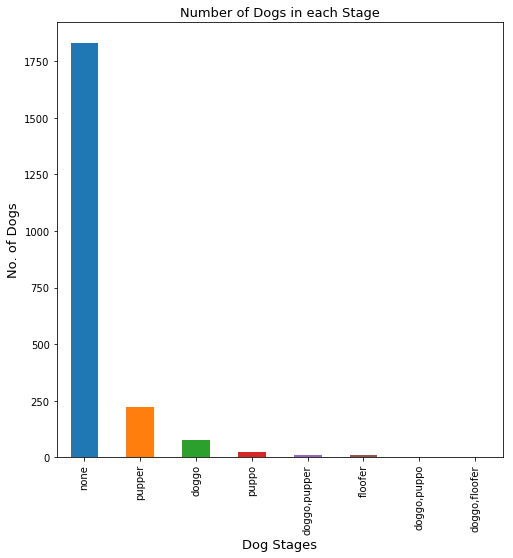

In [279]:
df_master['dog_stage'].value_counts().plot('bar', figsize=(8,8));
plt.title('Number of Dogs in each Stage', fontsize=13)
plt.ylabel('No. of Dogs',fontsize=13)
plt.xlabel('Dog Stages',fontsize=13);
           

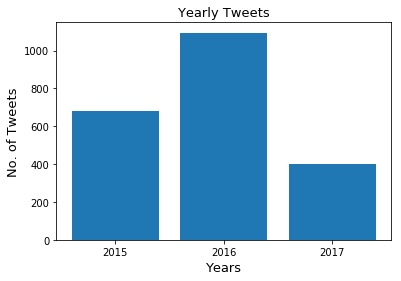

In [280]:
bar = ['2017', '2016', '2015']
Heights = [tweet_17, tweet_16, tweet_15]
plt.bar(bar, Heights)
plt.title('Yearly Tweets', fontsize=13)
plt.ylabel('No. of Tweets',fontsize=13)
plt.xlabel('Years',fontsize=13);